In [1]:
import pickle
import sys
sys.path.append("..")
from model import *
import cPickle as pickle

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)
/home/sturm/projects/subcellular_localization/venv/local/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/home/sturm/projects/subcellular_localization/venv/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
val_fn = pickle.load(open("../val_fn.pickle", 'rb'))

In [3]:
testd = np.load("../data/test.npz")

In [4]:
list(testd)

['X_test', 'mask_test', 'y_test']

In [5]:
inputs = testd['X_test']
targets = testd['y_test']
in_masks = testd['mask_test']

In [6]:
inputs[:128].shape

(128, 1000, 20)

In [7]:
targets.shape

(1195,)

In [8]:
in_masks[:128].shape

(128, 1000)

In [9]:
err, net_out, alpha, context = val_fn(inputs[:128], targets[:128], in_masks[:128])

In [10]:
%matplotlib inline
from pylab import * 

In [11]:
net_out

array([[  8.753559 ,   5.9917483,  -9.641323 , ...,   3.854523 ,
         -3.9351497,   1.3153294],
       [  8.686879 ,   5.9300933,  -9.509474 , ...,   3.8344018,
         -3.93137  ,   1.3016701],
       [  8.6107435,   5.8862376,  -9.403593 , ...,   3.8069553,
         -3.957398 ,   1.2674001],
       ...,
       [  8.87978  ,   6.4988995,  -9.67642  , ...,   4.212383 ,
         -3.7244422,   1.3157794],
       [ 19.585716 ,  15.509953 , -15.884379 , ...,  22.61881  ,
         -7.5340905,   6.499894 ],
       [  8.947663 ,   6.7043457,  -9.517456 , ...,   4.592578 ,
         -3.4464638,   1.2584772]], dtype=float32)

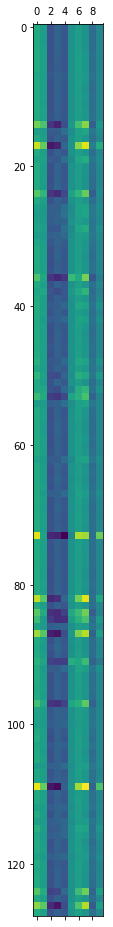

In [15]:
plt.matshow(net_out)